In [72]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
print('data has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

data has 284807 rows and 31 columns


In [4]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
61652,49925.0,-4.518511,-4.939294,0.672843,0.834987,3.228917,-2.284633,-2.534770,1.000989,-1.233868,...,0.178160,-0.918352,-0.092205,-0.330164,-0.122895,-0.578447,0.114263,-0.743181,28.70,0
99332,67071.0,-0.385860,0.602892,2.316958,0.698343,-0.339363,0.390791,0.019057,0.296439,0.291008,...,0.042271,0.329671,-0.101880,0.083482,-0.081847,-0.420262,0.114486,0.040932,11.00,0
85933,61005.0,-1.273470,0.395377,1.444303,-1.007030,-0.283455,-0.463191,-0.295771,0.538427,0.160842,...,0.203785,0.381095,-0.037748,-0.418184,-0.041631,1.019442,-0.214514,-0.004578,7.50,0
277466,167665.0,2.074273,0.269878,-1.840207,0.445605,0.574747,-1.002273,0.373331,-0.363555,0.586207,...,-0.352850,-0.801728,0.170315,-0.764610,0.011123,-0.546612,0.009272,-0.025871,9.99,0
151548,95665.0,-6.181103,4.520497,-1.173739,-1.529870,0.023048,-0.196153,1.199111,-0.493284,6.968677,...,-1.577618,-1.231717,0.164676,0.443417,1.170931,0.017975,1.624761,0.981822,0.01,0


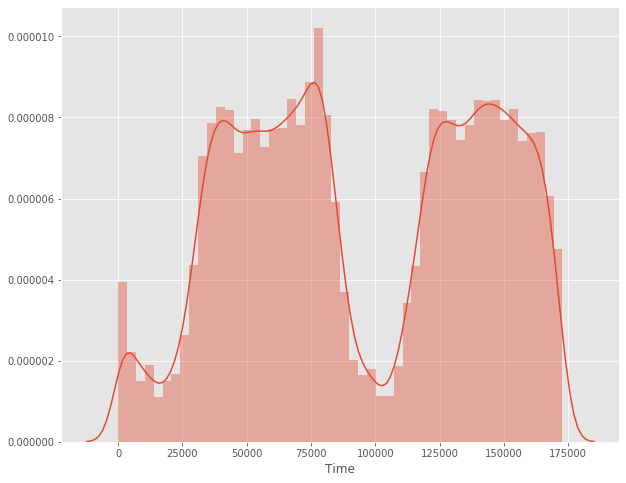

In [5]:
plt.figure(figsize=(10,8))
sns.distplot(df.Time)

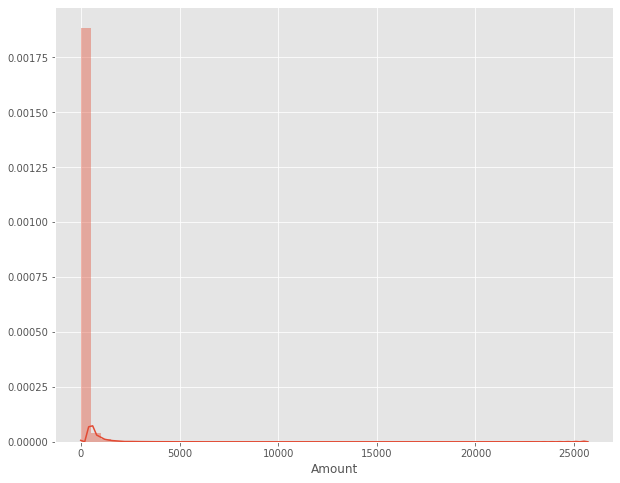

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(df.Amount)

In [7]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

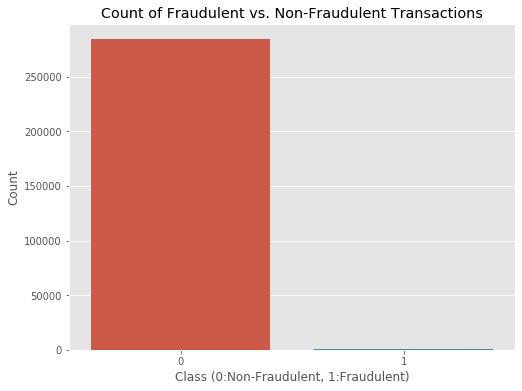

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [14]:
corr = df.corr()

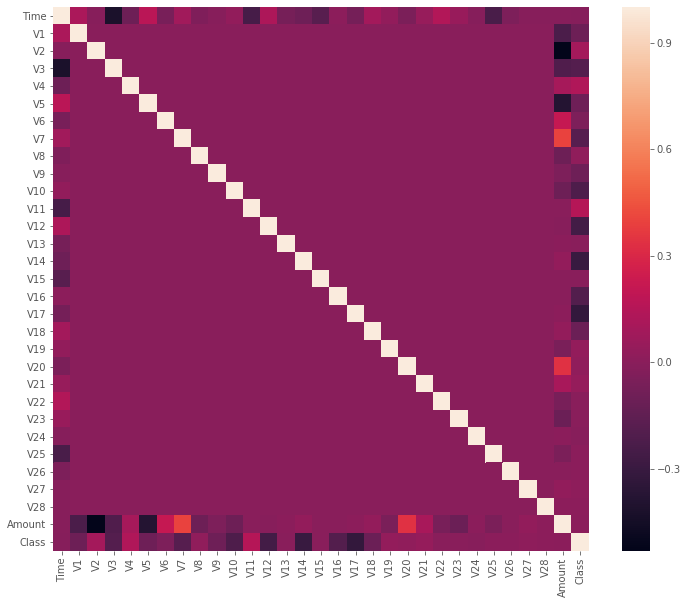

In [15]:
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)

In [16]:
skew_ = df.skew()

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [20]:
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [21]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
250320,154842.0,-1.186939,0.204765,-0.134074,-2.449746,0.411456,-0.927134,0.217591,0.403947,-1.613310,...,0.268048,0.651716,0.104474,-0.442379,0.095521,0.070235,5.00,0,-0.333239,1.264068
135864,81434.0,-0.805121,-0.763076,1.389078,-4.637015,0.090597,0.936682,0.061298,0.330038,0.752960,...,-0.081924,-1.041877,-0.331419,-1.032566,-0.032670,-0.100474,39.99,0,-0.193346,-0.281752
127615,78395.0,1.312835,-0.345534,-0.262535,-0.555116,-0.737650,-1.236477,-0.256368,-0.182312,-1.217822,...,-0.129809,0.467351,0.579092,-0.176777,-0.018979,0.023498,42.10,0,-0.184910,-0.345747
97331,66169.0,-1.839813,-0.136872,1.963307,-0.028765,1.234897,-1.635054,-0.073507,0.045427,-0.352564,...,-0.191925,0.564456,0.022103,0.011536,-0.011121,0.070517,1.98,0,-0.345313,-0.603201
258401,158637.0,2.038666,0.499771,-2.555612,0.554318,0.785373,-1.224131,0.238485,-0.213334,0.336287,...,-0.114453,-0.717098,0.279074,-0.089352,0.013295,-0.007946,1.00,0,-0.349231,1.343983


In [22]:
df.drop(['Amount','Time'], axis=1, inplace=True)

In [23]:
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]

In [24]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [25]:
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraud transactions in the train data.'.format(no_of_frauds))

There are 436 fraud transactions in the train data.


In [26]:
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [27]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
194695,-0.941793,0.885900,-0.486684,-0.397422,1.062448,-1.303646,0.855972,-0.406564,0.220618,-0.218154,...,-0.539851,0.303225,1.076229,-0.831449,-0.028457,-0.331636,0.328634,0,-0.342914,0.960623
254698,-1.203932,0.849647,-0.403050,-1.646909,2.580774,3.705221,-0.029082,1.463255,-0.629557,-0.905306,...,-0.185199,-0.319121,0.726004,0.776903,0.435415,0.116566,0.020781,0,-0.273268,1.609271
67875,-0.693905,0.705518,0.607284,-1.515873,-0.705914,-1.413903,0.193982,0.124688,-1.273761,0.078899,...,0.969663,-0.094254,0.766685,-0.252666,-0.364202,0.150997,0.162077,0,-0.317247,-0.817508
175677,1.758791,-1.001785,-1.880136,-0.487925,1.663900,3.841383,-1.049815,0.986536,0.857973,0.061708,...,0.509389,0.115045,0.745059,-0.291714,0.364595,-0.015660,-0.029960,0,0.142533,0.760594
123856,0.912403,0.105513,1.606245,2.771665,-0.811676,0.278818,-0.429207,0.142151,-0.252699,0.438850,...,0.700690,-0.031140,0.655644,0.267824,0.091467,0.050905,0.051703,0,-0.054013,-0.265369


In [28]:
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [29]:
subsample = pd.concat([selected, fraud])
len(subsample)

872

In [30]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,0.089815,-2.823237,0.492582,-0.102522,-2.204002,0.035033,-0.409273,0.006933,-0.418384,0.376792,...,0.318264,-0.582679,0.385095,0.065952,-0.271824,-0.074313,0.127762,0,2.215581,-1.218788
1,1.811947,-0.313958,-3.900696,0.276867,3.243415,2.921521,0.654756,0.429432,-0.454967,0.347770,...,0.878922,-0.310463,0.759166,0.864707,-0.189589,-0.061673,-0.060482,0,0.230211,1.061070
2,-0.782620,1.308173,0.401150,3.217007,2.434311,5.426911,-0.437765,0.988469,-0.877494,2.556221,...,1.018935,-0.091646,0.717643,-0.638863,0.449189,-0.098787,0.168525,0,-0.265351,1.543865
3,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,-19.836149,...,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1,-0.349231,0.128667
4,-1.396204,2.618584,-6.036770,3.552454,1.030091,-2.950358,-1.528506,0.189319,-1.433554,-5.569142,...,-0.390176,0.356029,-0.762352,0.096510,-0.487861,0.062655,-0.240732,1,-0.349231,0.735493


Text(0.5, 0, 'Class (0: non Fraud, 1: Fraud)')

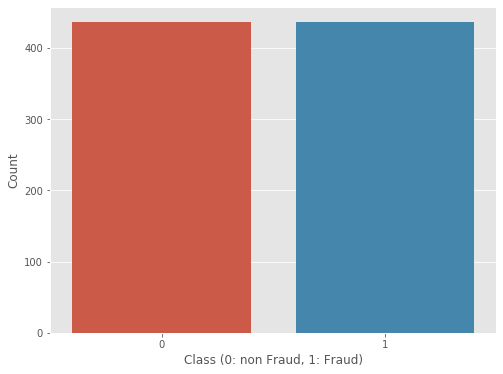

In [31]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.ylabel('Count')
plt.xlabel('Class (0: non Fraud, 1: Fraud)')

In [33]:
corr[corr.Class < -0.5]

,Class
V3,-0.555934
V9,-0.554170
V10,-0.620133
V12,-0.675231
V14,-0.747766
V16,-0.579127
V17,-0.556027


In [34]:
corr[corr.Class > 0.5]

,Class
V4,0.720949
V11,0.679479
Class,1.000000


In [32]:
corr = subsample.corr()
corr = corr[['Class']]

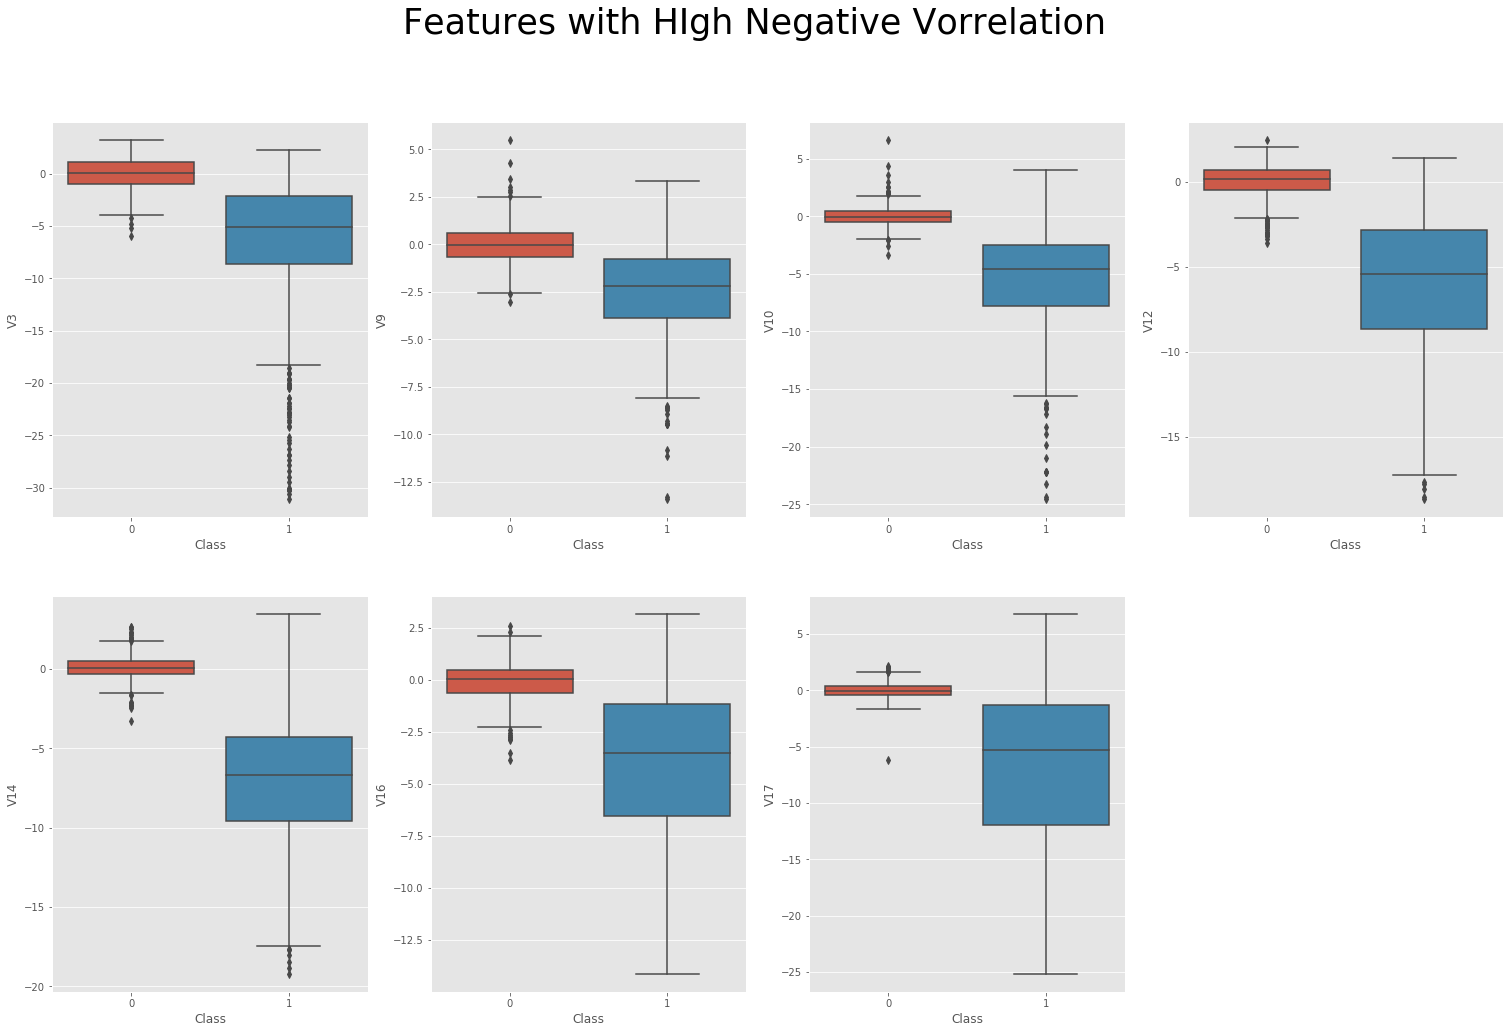

In [37]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features with HIgh Negative Vorrelation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

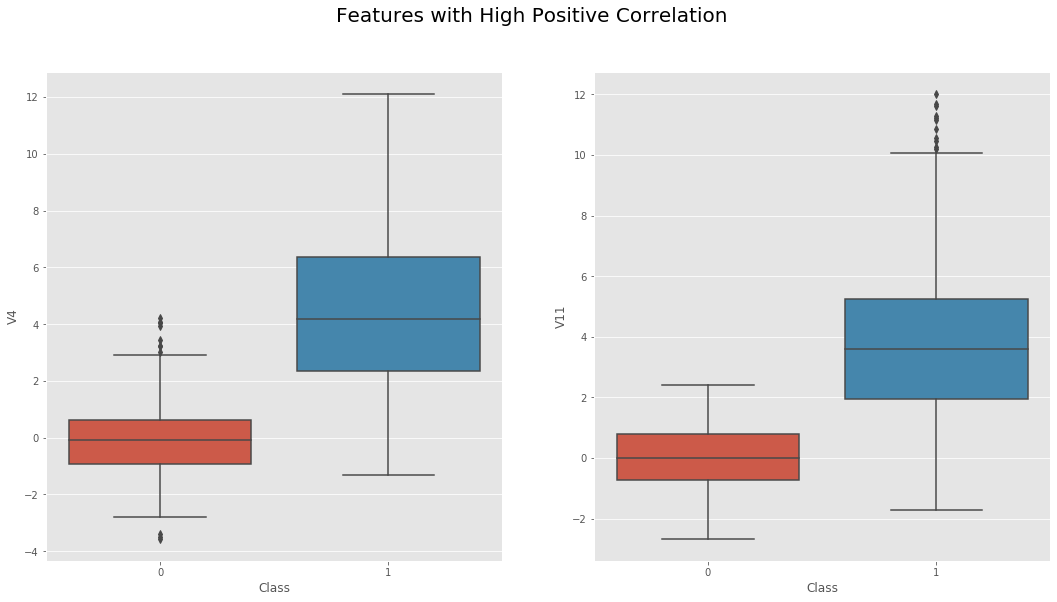

In [39]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features with High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [42]:
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) | (subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [44]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reducd the data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reducd the data size from 872 transactions by 258 transactions to 614 transactions.


In [47]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [48]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

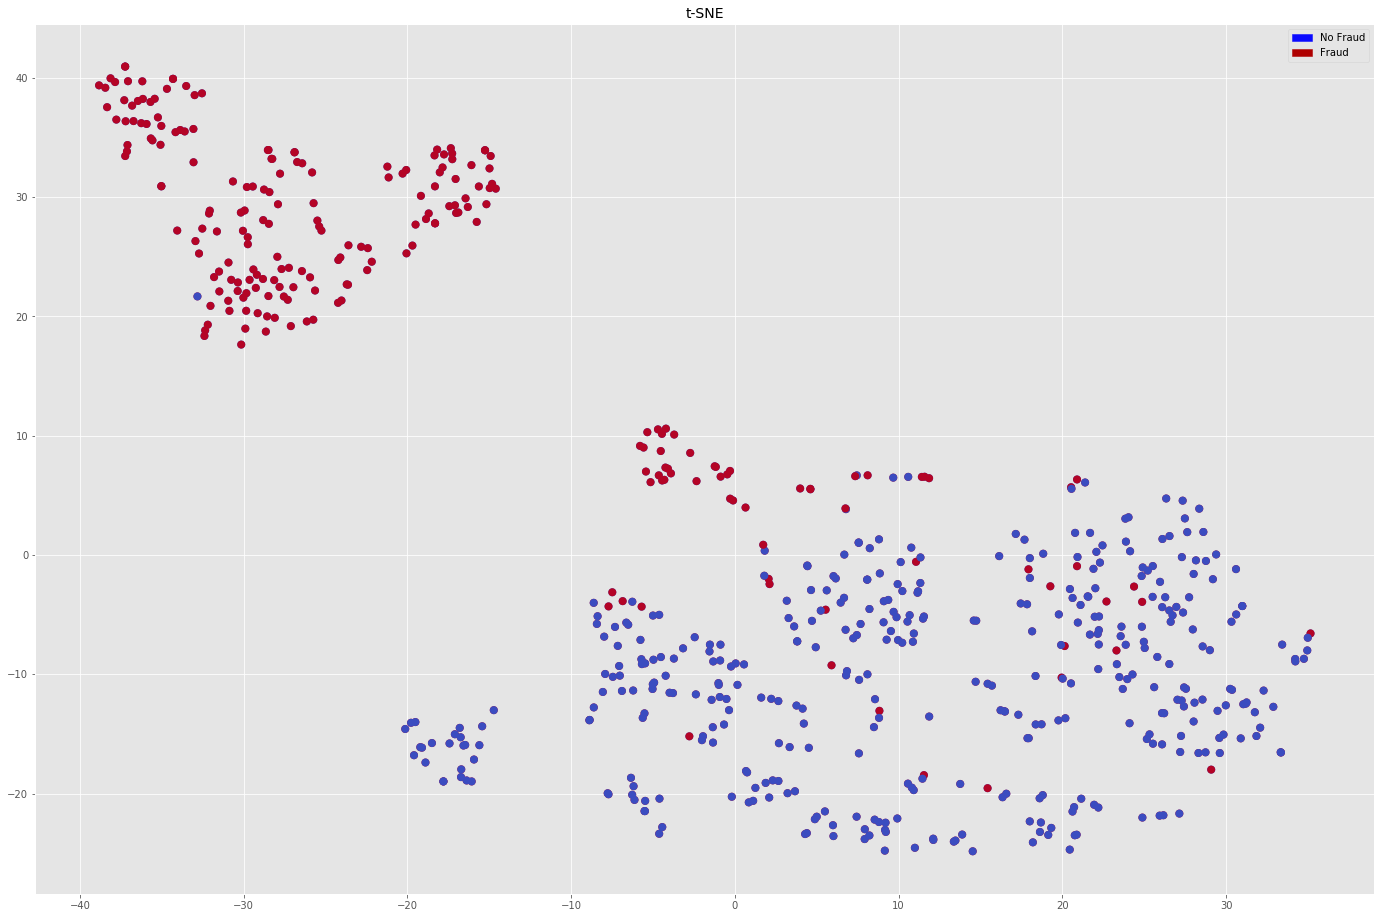

In [52]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [53]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warm = warn

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [55]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [61]:
!pip install xgboost

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [66]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.981987 (0.018910)
LDA: 0.976868 (0.018954)
KNN: 0.962935 (0.037527)
CART: 0.904036 (0.043937)
SVM: 0.968423 (0.029539)


C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

XGB: 0.975902 (0.030836)


C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nahum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RF: 0.965279 (0.025448)


C:\Users\nahum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


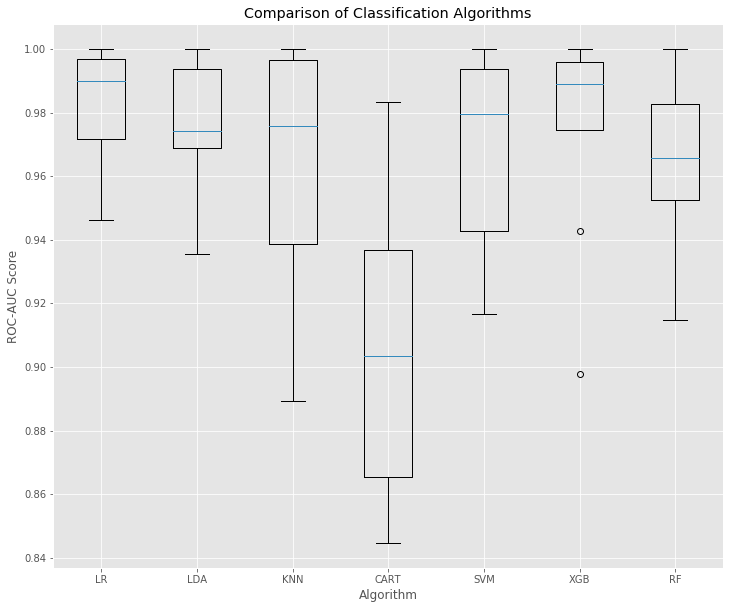

In [68]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [73]:
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified